# Python@Library 2024 - Teil 1

Jitao David Zhang, Januar 2024

Wir lernen gemeinsam Jupyter Lab kennen mit eine simulierte klinische Studie. Wir werden die Daten mit Jupyter Notebook analysieren und visualisieren, und die Daten gemeinsam interpretieren.

Die Code wurde auf [jupyter.org/try-jupyter](https://jupyter.org/try-jupyter) getestet. Man braucht nur eine Web-browser, um das Program durchzuführen.

## Sicherstellen, dass Jupyter funktioniert

In [1]:
3 + 9

12

In [2]:
9/3

3.0

In [3]:
my_name = "David"
welcome = "Hello, " + my_name
print(welcome)

Hello, David


In [4]:
import numpy as np

In [5]:
my_numbers = range(1, 10)
np.sum(my_numbers)

45

In [6]:
my_numbers_2 = range(1, 100)
np.sum(my_numbers_2)

4950

# Eine klinische Studie simulieren

In [7]:
import pandas as pd

In [8]:
np.random.seed(20240126)

In [9]:
names = ["Emma", "Olivia", "Emily", "James", "Daniel",
         "Benjamin", "Alexander", 
         "Isabella", "Thomas", "Sarah", "Charlotte", "Elizabeth",
         "Liam", "Mia", "Ethan", "Ella", "Sophia", "Joshua", "Oliver",
         "Anna", "Lena", "Laila", "Emma", "Karl"]
len(names)

24

In [10]:
pre_g0 = np.random.normal(8, 1, size=8)
post_g0 = np.random.normal(8, 1, size=8)
pre_g1 = np.random.normal(8, 1, size=8)
post_g1 = np.random.normal(6, 1, size=8)
pre_g2 = np.random.normal(8, 1, size=8)
post_g2 = np.random.normal(4, 1, size=8)
pre_all = np.round(np.clip(np.concatenate((pre_g0, pre_g1, pre_g2), axis=None), 0, 10), 1)
post_all = np.round(np.clip(np.concatenate((post_g0, post_g1, post_g2), axis=None), 0, 10))

In [11]:
treatments = np.concatenate((["PilleA"] * 8, ["PilleB"] * 8, ["PilleC"] * 8), axis=None)

In [12]:
trial_data = pd.DataFrame({"Name":names,
                          "Behandlung": treatments,
                          "Vor": pre_all,
                          "Nach": post_all},
                         index=names)

In [13]:
print(trial_data)

                Name Behandlung   Vor  Nach
Emma            Emma     PilleA   7.4   9.0
Olivia        Olivia     PilleA   8.7   6.0
Emily          Emily     PilleA   7.5   8.0
James          James     PilleA   7.9  10.0
Daniel        Daniel     PilleA   8.8   7.0
Benjamin    Benjamin     PilleA  10.0   9.0
Alexander  Alexander     PilleA   9.0   9.0
Isabella    Isabella     PilleA   6.8   7.0
Thomas        Thomas     PilleB   7.7   4.0
Sarah          Sarah     PilleB   6.9   6.0
Charlotte  Charlotte     PilleB   6.7   7.0
Elizabeth  Elizabeth     PilleB   9.1   8.0
Liam            Liam     PilleB   7.7   7.0
Mia              Mia     PilleB   8.8   7.0
Ethan          Ethan     PilleB   8.1   5.0
Ella            Ella     PilleB   8.1   6.0
Sophia        Sophia     PilleC   7.7   3.0
Joshua        Joshua     PilleC   6.8   5.0
Oliver        Oliver     PilleC   6.7   4.0
Anna            Anna     PilleC   7.8   4.0
Lena            Lena     PilleC   6.9   3.0
Laila          Laila     PilleC 

In [14]:
trial_data.sort_values(by=["Behandlung", "Name"])

,Name,Behandlung,Vor,Nach
Alexander,Alexander,PilleA,9.0,9.0
Benjamin,Benjamin,PilleA,10.0,9.0
Daniel,Daniel,PilleA,8.8,7.0
Emily,Emily,PilleA,7.5,8.0
Emma,Emma,PilleA,7.4,9.0
Isabella,Isabella,PilleA,6.8,7.0
James,James,PilleA,7.9,10.0
Olivia,Olivia,PilleA,8.7,6.0
Charlotte,Charlotte,PilleB,6.7,7.0
Elizabeth,Elizabeth,PilleB,9.1,8.0


## Wie kann man eine Liste von Angaben in einer DateFrame umwandeln?

In [15]:
person1 = ['David', 'PilleA', 4.7, 4.5]
person2 = ['Emma', 'PilleB', 4.5, 4]
person3 = ['Matteo', 'PilleC', 4.5, 4]
person_df = pd.DataFrame([person1, person2, person3],
            columns=['Name', 'Behandlung', 'Vor', 'Nach'])
person_df.index = person_df["Name"].tolist()
person_df

,Name,Behandlung,Vor,Nach
David,David,PilleA,4.7,4.5
Emma,Emma,PilleB,4.5,4.0
Matteo,Matteo,PilleC,4.5,4.0


## Die Daten mit Abbildungen darstellen

In [16]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use("fast")

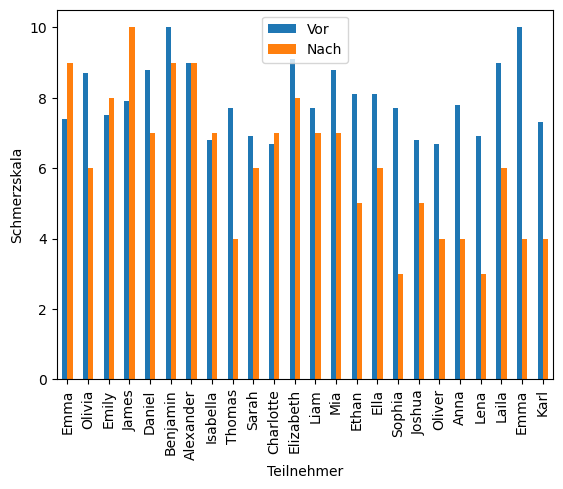

In [17]:
ax = trial_data.plot.bar()
plt.xlabel("Teilnehmer")
plt.ylabel("Schmerzskala")
plt.show()

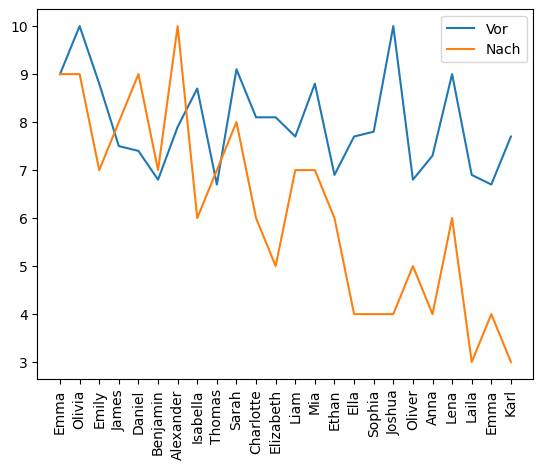

In [18]:
ax = trial_data.sort_values(['Behandlung', 'Name']).plot.line(rot=90)
ax.set_xticks(range(len(trial_data['Name'])))
ax.set_xticklabels(trial_data['Name'])
plt.show()

<Axes: >

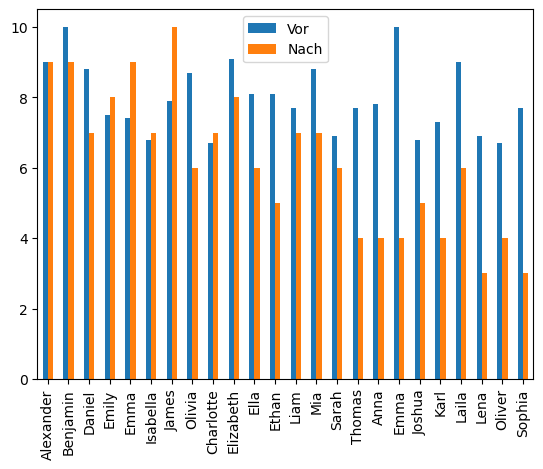

In [19]:
trial_data.sort_values(by=["Behandlung", "Name"]).plot.bar()

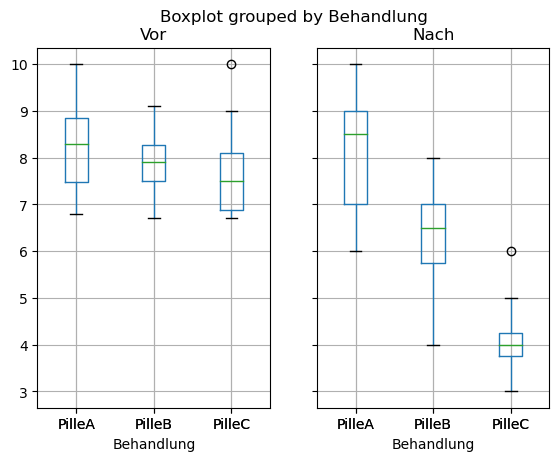

In [20]:
trial_data.boxplot(column=["Vor", "Nach"], by="Behandlung")
plt.show()

## Mit den Daten arbeiten

In [21]:
trial_data["Unterschied"] = trial_data["Nach"] - trial_data["Vor"]
print(trial_data)

                Name Behandlung   Vor  Nach  Unterschied
Emma            Emma     PilleA   7.4   9.0          1.6
Olivia        Olivia     PilleA   8.7   6.0         -2.7
Emily          Emily     PilleA   7.5   8.0          0.5
James          James     PilleA   7.9  10.0          2.1
Daniel        Daniel     PilleA   8.8   7.0         -1.8
Benjamin    Benjamin     PilleA  10.0   9.0         -1.0
Alexander  Alexander     PilleA   9.0   9.0          0.0
Isabella    Isabella     PilleA   6.8   7.0          0.2
Thomas        Thomas     PilleB   7.7   4.0         -3.7
Sarah          Sarah     PilleB   6.9   6.0         -0.9
Charlotte  Charlotte     PilleB   6.7   7.0          0.3
Elizabeth  Elizabeth     PilleB   9.1   8.0         -1.1
Liam            Liam     PilleB   7.7   7.0         -0.7
Mia              Mia     PilleB   8.8   7.0         -1.8
Ethan          Ethan     PilleB   8.1   5.0         -3.1
Ella            Ella     PilleB   8.1   6.0         -2.1
Sophia        Sophia     PilleC

In [22]:
trial_data.sort_values("Unterschied", ascending=False)

,Name,Behandlung,Vor,Nach,Unterschied
James,James,PilleA,7.9,10.0,2.1
Emma,Emma,PilleA,7.4,9.0,1.6
Emily,Emily,PilleA,7.5,8.0,0.5
Charlotte,Charlotte,PilleB,6.7,7.0,0.3
Isabella,Isabella,PilleA,6.8,7.0,0.2
Alexander,Alexander,PilleA,9.0,9.0,0.0
Liam,Liam,PilleB,7.7,7.0,-0.7
Sarah,Sarah,PilleB,6.9,6.0,-0.9
Benjamin,Benjamin,PilleA,10.0,9.0,-1.0
Elizabeth,Elizabeth,PilleB,9.1,8.0,-1.1


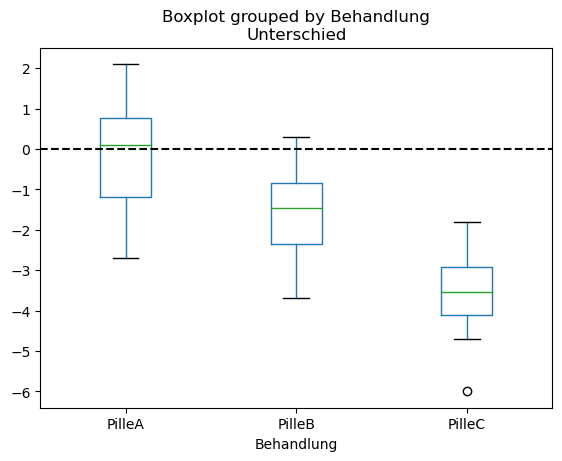

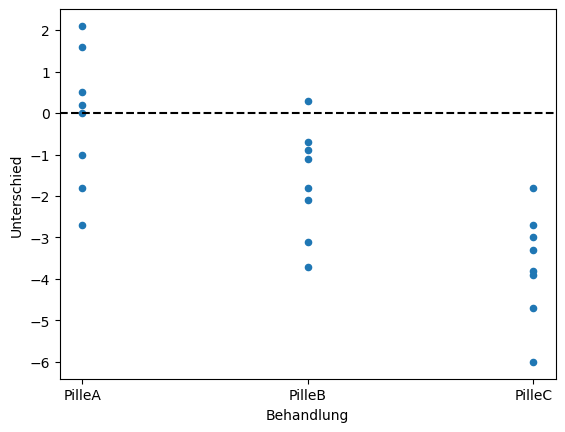

In [23]:
trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
trial_data.plot.scatter("Behandlung", "Unterschied")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()

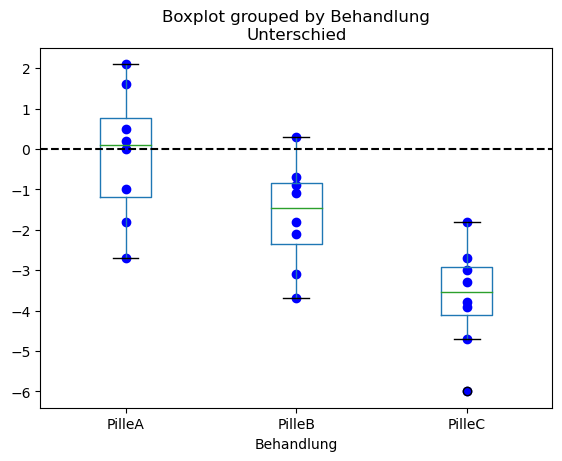

In [24]:
p = trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
for b, d in enumerate(trial_data["Unterschied"]):
    behandlung = trial_data["Behandlung"][b]
    if behandlung == "PilleA":
        x = 1
    elif behandlung == "PilleB":
        x = 2
    elif behandlung == "PilleC":
        x = 3
    plt.scatter(x, d, c="blue")
plt.show()

In [25]:
## density plot is not supported by Jupyter
## trial_pivot = trial_data.reset_index().pivot(columns="Behandlung", values="Unterschied")
## trial_pivot.plot.density()
## plt.axvline(x=0, c="k", linestyle="--")
## plt.show()

## Eine kleine statistische Analyse

In [26]:
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [27]:
pille_effect = ols('Unterschied ~ Behandlung', data = trial_data).fit()
print(pille_effect.summary())

                            OLS Regression Results                            
Dep. Variable:            Unterschied   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     12.33
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           0.000287
Time:                        10:15:17   Log-Likelihood:                -40.860
No. Observations:                  24   AIC:                             87.72
Df Residuals:                      21   BIC:                             91.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1375 

In [28]:
table = sma.stats.anova_lm(pille_effect)
print(table)

              df     sum_sq    mean_sq          F    PR(>F)
Behandlung   2.0  49.700833  24.850417  12.331984  0.000287
Residual    21.0  42.317500   2.015119        NaN       NaN


## Die Daten exportieren

In [29]:
trial_data[['Behandlung', 'Vor', 'Nach']].to_csv("20240126-simulated-trial-data.tsv", sep="\t", index=False)

## Fragen

1. Wer glaubt, dass ihre/sein Pille hat funktioniert für sie/ihn? Wer glaubt, dass die Pille nicht funktioniert hat?
2. Wenn wir davon ausgehen, dass Pille A, Pille B, Pille C jeweilse Placebo, ein neu Medikament von einer niedriger Dose, und das selbe neue Medikament von einer höheren Dose sind. Welche Schlussfolgerungen können wir ziehen?
3. Um das Medikament zu mehr Patienten bringen, worauf müssen wir noch beachten?
4. Was können wir noch mit den Daten machen? Falls Du Lust und Zeit hast, probiere [ChatGPT](https://chat.openai.com/) oder ähnliche Tools zu benutzen, um mit den Daten bzw. mit unseren Code zu spielen, z.B. neue Funktionalität hinzufügen oder andere Visualisierungen zu realisieren.

## Ein Prompt für ChatGPT

Die folgende Code wurde von ChatGPT am 27.01.2024 generiert.

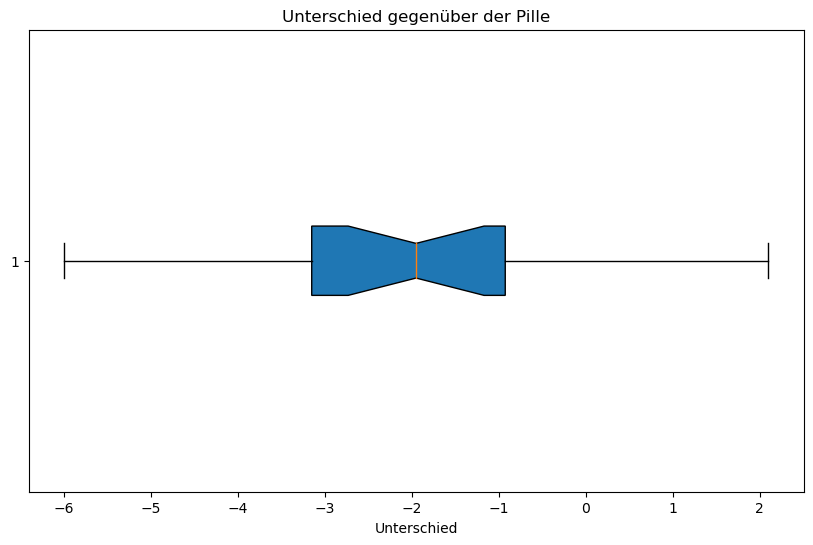

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten in DataFrame laden
data = {
    'Name': ['Silas', 'Yann', 'Pascal', 'Thirushandhini', 'Jannick', 'Dalmika', 'Peter', 'Diego', 'Tom', 'Arwin', 'Valery', 'Stefan', 'Susanne', 'Simon', 'Giulia', 'Dana', 'Alex', 'Mattheo', 'Andreas', 'David'],
    'Pille': ['C', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'A'],
    'Vor': [7.3, 8.1, 8.7, 10.0, 6.9, 9.0, 8.1, 8.7, 7.7, 7.8, 7.7, 8.8, 6.7, 10.0, 9.0, 9.1, 6.7, 6.8, 6.8, 7.9],
    'Nach': [4.0, 6.0, 7.0, 4.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 7.0, 7.0, 7.0, 9.0, 9.0, 8.0, 4.0, 7.0, 5.0, 10.0],
    'Unterschied': [-3.3, -2.1, -1.7, -6.0, -3.9, -3.0, -3.1, -2.7, -3.7, -3.8, -0.7, -1.8, 0.3, -1.0, 0.0, -1.1, -2.7, 0.2, -1.8, 2.1]
}

df = pd.DataFrame(data)

# Boxplot erstellen
plt.figure(figsize=(10, 6))
plt.boxplot(df['Unterschied'], vert=False, notch=True, patch_artist=True)
plt.title('Unterschied gegenüber der Pille')
plt.xlabel('Unterschied')
plt.show()

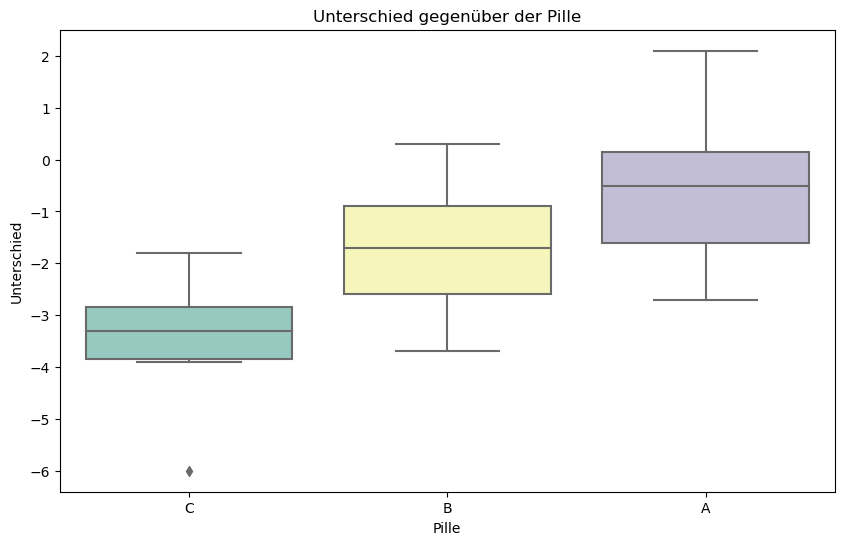

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten in DataFrame laden
data = {
    'Name': ['Silas', 'Yann', 'Pascal', 'Thirushandhini', 'Jannick', 'Dalmika', 'Peter', 'Diego', 'Tom', 'Arwin', 'Valery', 'Stefan', 'Susanne', 'Simon', 'Giulia', 'Dana', 'Alex', 'Mattheo', 'Andreas', 'David'],
    'Pille': ['C', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'A'],
    'Vor': [7.3, 8.1, 8.7, 10.0, 6.9, 9.0, 8.1, 8.7, 7.7, 7.8, 7.7, 8.8, 6.7, 10.0, 9.0, 9.1, 6.7, 6.8, 6.8, 7.9],
    'Nach': [4.0, 6.0, 7.0, 4.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 7.0, 7.0, 7.0, 9.0, 9.0, 8.0, 4.0, 7.0, 5.0, 10.0],
    'Unterschied': [-3.3, -2.1, -1.7, -6.0, -3.9, -3.0, -3.1, -2.7, -3.7, -3.8, -0.7, -1.8, 0.3, -1.0, 0.0, -1.1, -2.7, 0.2, -1.8, 2.1]
}

df = pd.DataFrame(data)

# Boxplot erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pille', y='Unterschied', data=df, palette='Set3')
plt.title('Unterschied gegenüber der Pille')
plt.xlabel('Pille')
plt.ylabel('Unterschied')
plt.show()